In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [42]:
# Create our session (link) from Python to the DB
session =  Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
recent_date

('2017-08-23',)

<Figure size 2000x600 with 0 Axes>

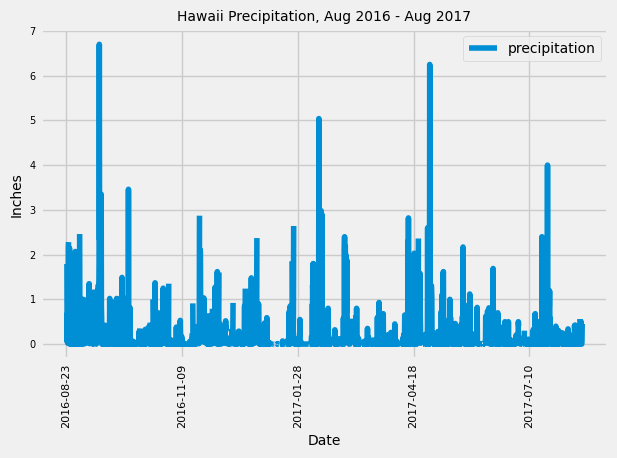

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Could also input "one_year_ago" but didn't want to pass the date as a variable in query
# Could also input dt.date(2016, 8, 23)

query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= dt.date(2017, 8, 23) - dt.timedelta(days=365))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurements_df =pd.DataFrame(query, columns=['date', 'precipitation'])

# Sort the dataframe by date
measurements_df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20, 6)) 
measurements_df.plot('date', 'precipitation')

# Add axis labels, title, and legend
plt.xlabel("Date",  size = 10)
plt.ylabel("Inches", size = 10)
plt.title("Hawaii Precipitation, Aug 2016 - Aug 2017", size=10)
plt.legend(["precipitation"],loc='upper right', fontsize=10)

# Add axis ticks
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 7)

# Add plot grid and tight layout
plt.grid(True)
plt.tight_layout()

# Save and show figure
plt.savefig("../output/precipitation.png")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurements_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()

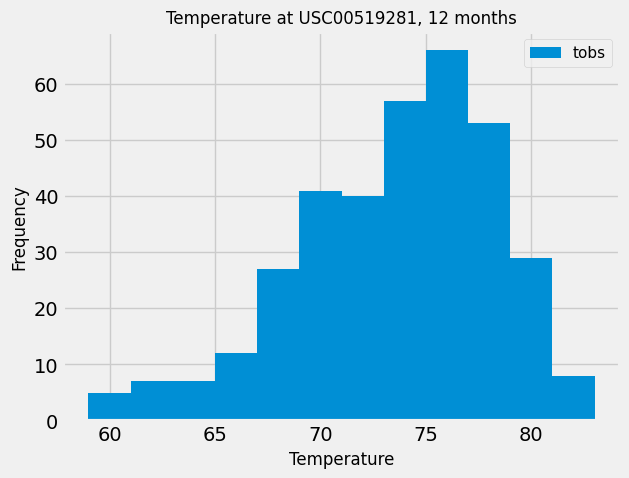

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date>='2016-08-23').all()

# Add to dataframe with column for temperature
station_df=pd.DataFrame(results,columns=['tobs'])

# Plot as histogram with 12 bins
station_df.plot.hist(bins=12)

# Add title, axis labels, and legend
plt.title("Temperature at USC00519281, 12 months", size=12)
plt.xlabel("Temperature", size=12)
plt.ylabel("Frequency", size=12)
plt.legend(["tobs"],loc='upper right', fontsize=11)

# Save and show figure
plt.savefig("../output/station.png")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()